### Problem Statement

About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

### Problem Statement

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

df = pd.read_csv("train.csv") #READING THE DATASET IN A DATAFRAME USING PANDAS

In [2]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


#### Variable Identification

In [52]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [53]:
continuous = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] not in ['object']]
print("\n Continuous Variables",'\n',continuous)

categorical = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object'] and key != "Loan_ID"]
print("\n Categorical Variables",'\n',categorical)


 Continuous Variables 
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

 Categorical Variables 
 ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


#### UNIVARIATE ANALYSIS
##### SUMMARY OF NUMERICAL FIELDS

In [17]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


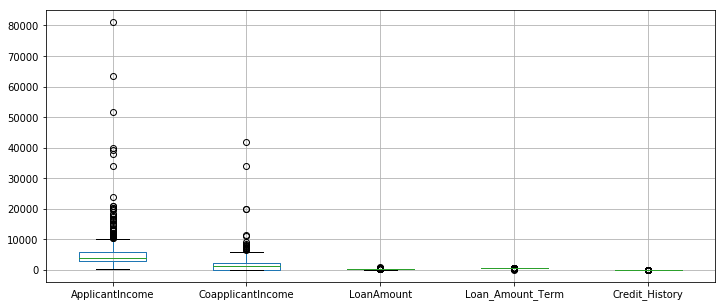

In [23]:
df.boxplot(figsize = (12,5))

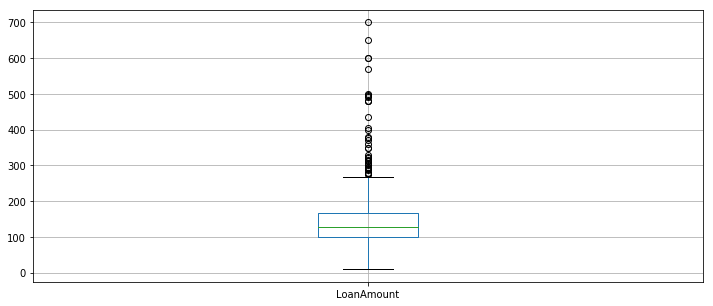

In [25]:
df.boxplot(column = ['LoanAmount'], figsize = (12,5))

### Population Distribution in Categorical Fields

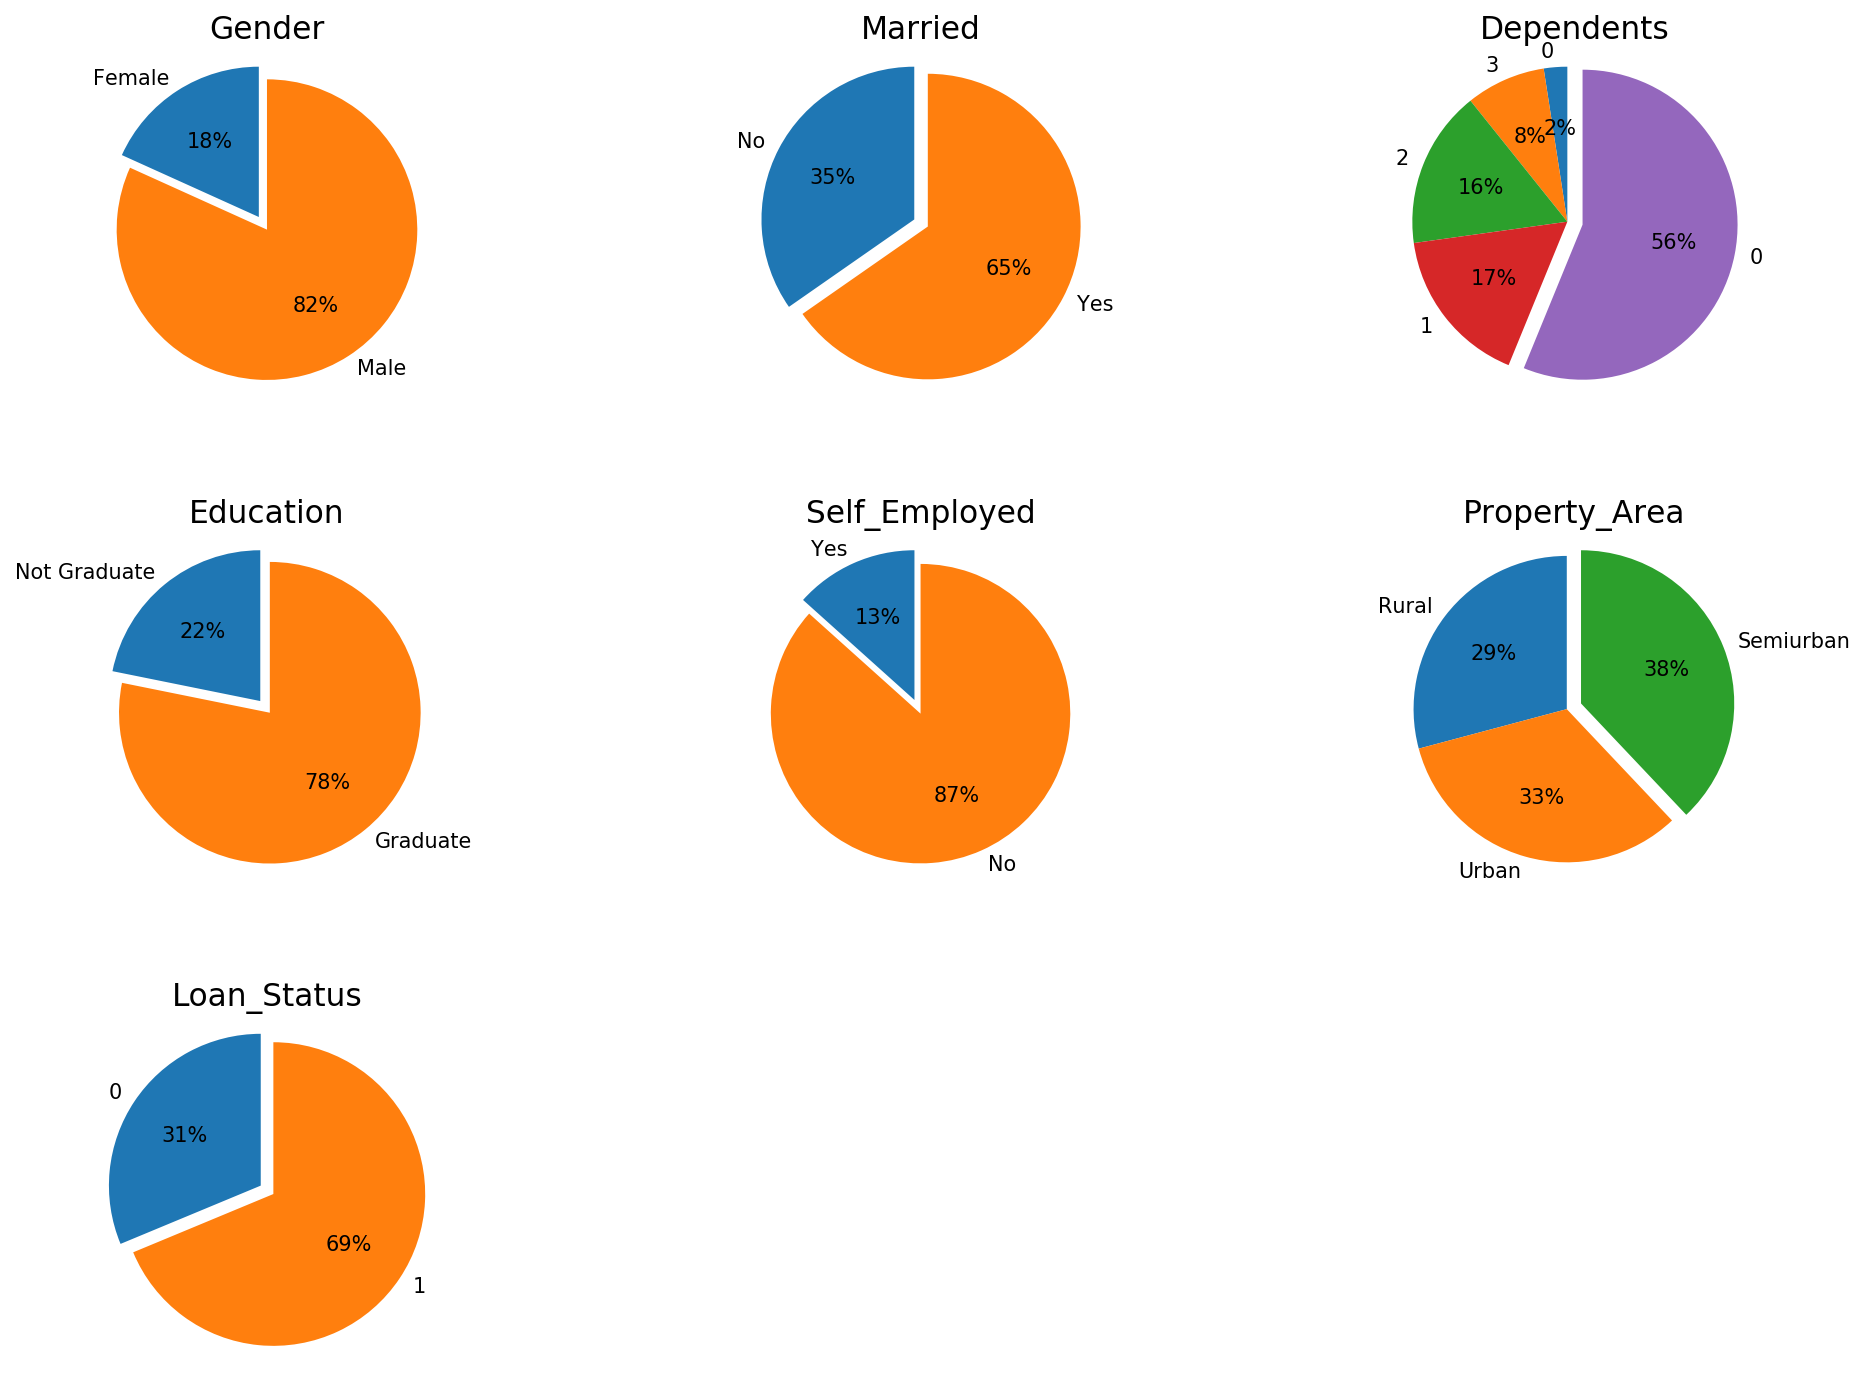

In [136]:
num = 0
fig = plt.figure(figsize=(15,10), dpi=150)
import matplotlib as mpl

for x in range(3):
    for y in range(3):
        if num == len(categorical):
            break
        ax1 = plt.subplot2grid((3,3),(x,y))
        label = categorical[num]
        countdata = df[label].value_counts(ascending=True)
        labels = countdata.index
        sizes = countdata
        explode = np.zeros(len(labels))
        explode[len(explode)-1] = 0.1
        
        # Plot
        plt.pie(sizes, labels=labels,explode=explode,
            autopct='%1.0f%%', shadow=False, startangle=90)
        plt.subplots_adjust(top=1)
        plt.title(label,fontsize=15)
        mpl.rcParams['font.size'] = 10
        plt.axis('equal')
        num += 1

fig.subplots_adjust(hspace=.4,wspace = 0.5) 
fig.savefig('charts\Exploring Categorical Fields.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()

### Distribution analysis

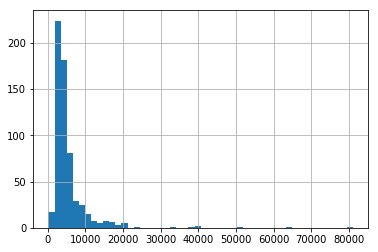

In [4]:
df['ApplicantIncome'].hist(bins=50)

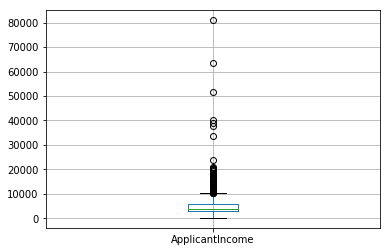

In [5]:
# AS FEW EXTREME VALUES ARE FOUND, WE CHECK FOR OUTLIERS USING BOXPLOTS
df.boxplot(column = 'ApplicantIncome')

This confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education

Text(0.5,0.98,'')

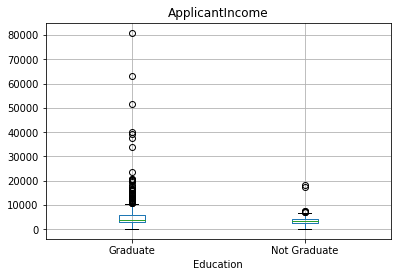

In [5]:
df.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

#### Loan Amount

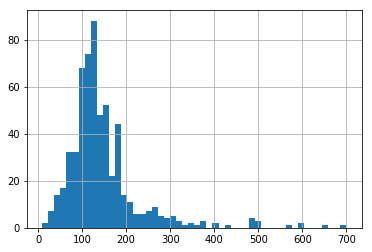

In [6]:
df['LoanAmount'].hist(bins=50)

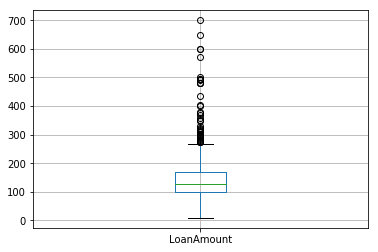

In [136]:
df.boxplot(column='LoanAmount')

Again, there are some extreme values. Clearly, both ApplicantIncome and LoanAmount require some amount of data munging. LoanAmount has missing and well as extreme values values, while ApplicantIncome has a few extreme values, which demand deeper understanding. 

In [82]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean(),
                       fill_value=0)

print('Frequency Table for Credit History:' )
print(temp1)

print('\nProbility of getting loan for each Credit History class:')
print(temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


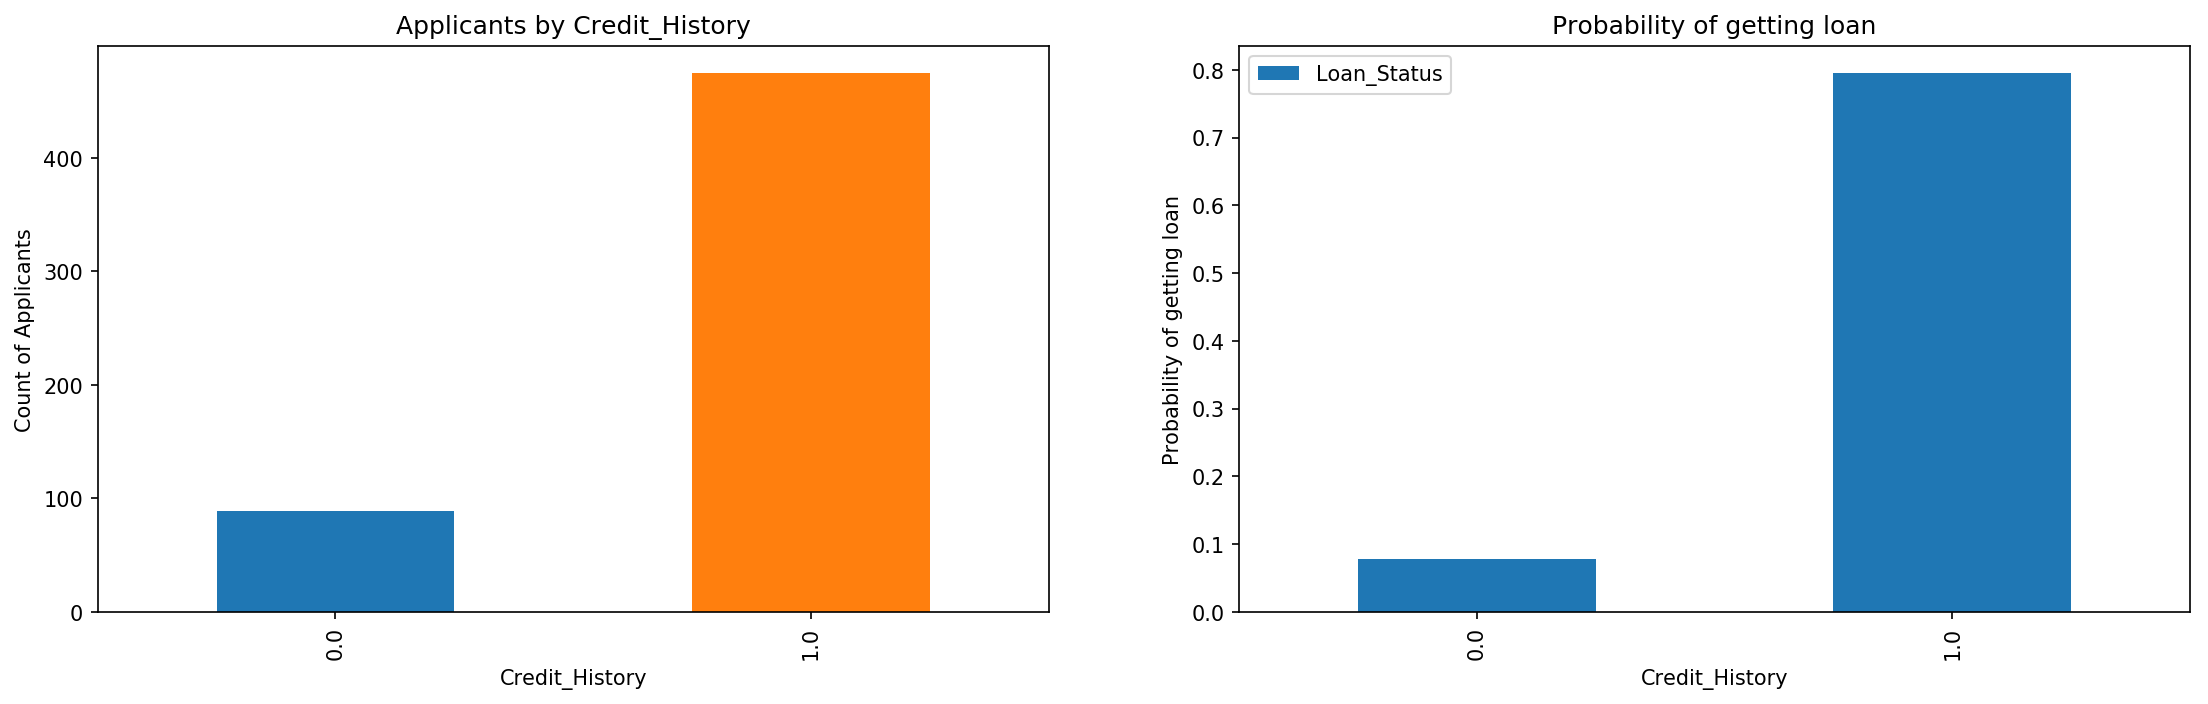

In [83]:
plt.figure(figsize=(18,5), dpi=150)
ax = temp1.plot(kind="bar",ax=plt.subplot(121),title = "Applicants by Credit_History")
ax.set_xlabel('Credit_History')
ax.set_ylabel('Count of Applicants')

ax=temp2.plot(kind="bar",ax=plt.subplot(122),title = "Probability of getting loan")
ax.set_xlabel('Credit_History')
ax.set_ylabel('Probability of getting loan')

plt.savefig('charts\Credit History vs Loan Status.png', bbox_inches='tight')
plt.show()

This shows that the chances of getting a loan are eight-fold if the applicant has a valid credit history. 

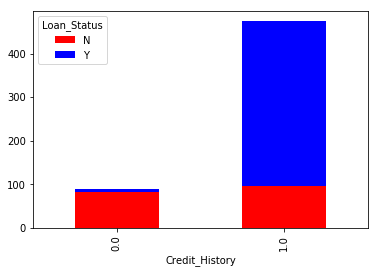

In [156]:
temp3 = pd.crosstab(index=[df['Credit_History']], columns =df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

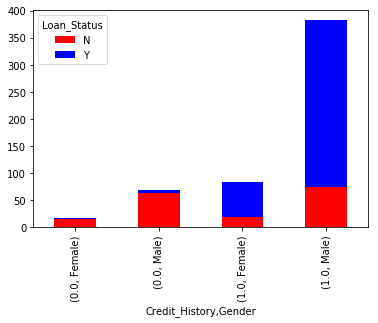

In [157]:
temp3 = pd.crosstab(index=[df['Credit_History'],df['Gender']], columns =df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

## Data Munging

#### CHECK MISSING VALUES

In [3]:
df.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

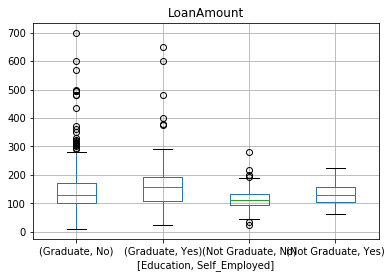

In [4]:
df.boxplot(column = 'LoanAmount' , by = ['Education','Self_Employed'])
plt.suptitle("")
plt.show()

In [5]:
df['Self_Employed'].value_counts(ascending=True)
#print('\n',df['Gender'].value_counts(ascending=True))
#print('\n',df['Married'].value_counts(ascending=True))
#print('\n',df['Dependents'].value_counts(ascending=True))

Yes     82
No     500
Name: Self_Employed, dtype: int64

Since ~86% values are “No”, it is safe to impute the missing values as “No” as there is a high probability of success. This can be done using the following code:

In [6]:
'Imputing Missing values'
df['Self_Employed'].fillna('No', inplace=True)
df['Gender'].fillna('Male',inplace=True)
df['Married'].fillna('Yes',inplace=True)

df['Dependents'].fillna(0,inplace=True)
df['Dependents'] = df['Dependents'].map(lambda x: 3 if x=='3+' else x)
df['Dependents'] = df['Dependents'].astype(int)

df['Loan_Amount_Term'].fillna(360,inplace=True)

In [7]:
df['Loan_Status'] = df['Loan_Status'].map(lambda x: 1 if x=='Y' else 0)
df['Credit_History'].fillna(df['Loan_Status'],inplace=True)

Now, we will create a Pivot table, which provides us median values for all the groups of unique values of Self_Employed and Education features. Next, we define a function, which returns the values of these cells and apply it to fill the missing values of loan amount:

In [8]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [9]:
df.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Treat Extreme Values

Let’s analyze LoanAmount first. Since the extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect

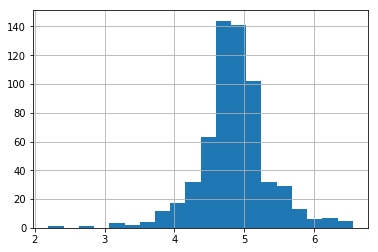

In [10]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

Coming to ApplicantIncome. One intuition can be that some applicants have lower income but strong support Co-applicants. So it might be a good idea to combine both incomes as total income and take a log transformation of the same.

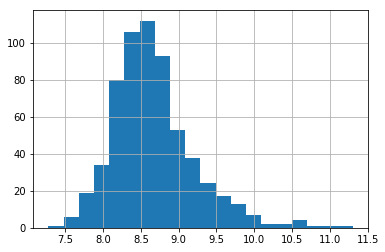

In [27]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome'] = np.log(df['TotalIncome'])
df['TotalIncome'].hist(bins=20)

### Building a Predictive Model

Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories. This can be done using the following code:

In [12]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder
classes = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

le = LabelEncoder()
for i in classes:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int32
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
dtype: object

In [19]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

C:\Users\prasa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

### Logistic Regression

In [21]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 83.062%
Cross-Validation Score : 83.065%


In [22]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 83.062%
Cross-Validation Score : 83.065%


Generally we expect the accuracy to increase on adding variables. But this is a more challenging case. The accuracy and cross-validation score are not getting impacted by less important variables. Credit_History is dominating the mode. We have two options now:

Feature Engineering: dereive new information and try to predict those. I will leave this to your creativity.
Better modeling techniques. 

### Decision Tree

In [23]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 83.062%
Cross-Validation Score : 83.065%


Here the model based on categorical variables is unable to have an impact because Credit History is dominating over them. Let’s try a few numerical variables:

In [24]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 89.902%
Cross-Validation Score : 70.677%


### Random Forest

In [28]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 79.645%


Here we see that the accuracy is 100% for the training set. This is the ultimate case of overfitting and can be resolved in two ways:

Reducing the number of predictors and
Tuning the model parameters

In [30]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

Credit_History      0.332460
TotalIncome         0.243847
LoanAmount_log      0.201800
Property_Area       0.046171
Loan_Amount_Term    0.043739
Dependents          0.043087
Married             0.025298
Education           0.022498
Gender              0.021529
Self_Employed       0.019572
dtype: float64


In [31]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 84.528%
Cross-Validation Score : 82.090%


#### Thus we conclude, having advanced model may not guarantee good results. Even a simple model can be a good model like we observe with this data set.